In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 상현_쓰레기데이터 EDA
- 데이터 2019년도 발생량, 재활용, 매립, 소각, 기타만 * 365

In [3]:
waste = pd.read_csv('../../DB/폐기물데이터_행정구역변경_2.csv', encoding='CP949')

In [4]:
waste

,행정구역,시도,시군구,폐기물_종류,폐기물_종류1,폐기물_종류2,재활용,소각,매립,기타,발생량,연도
0,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐지류,0.0,9125.0,4672.0,0.0,13797.0,2019
1,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐합성수지류,0.0,5365.5,2737.5,0.0,8103.0,2019
2,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐고무류,0.0,182.5,73.0,0.0,255.5,2019
3,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐섬유류,0.0,511.0,255.5,0.0,766.5,2019
4,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,음식물류 폐기물,0.0,693.5,365.0,0.0,1058.5,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
42360,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,폐전기전자제품,NaN,1027.6,0.0,0.0,0.0,1027.6,2023
42361,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,폐가구류,NaN,0.0,0.0,0.0,0.0,0.0,2023
42362,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,기타,NaN,200.0,0.0,0.0,0.0,200.0,2023
42363,제주_서귀포시,제주,서귀포시,재활용 가능자원 분리배출,재활용 잔재물,NaN,0.0,1627.4,718.0,0.0,2345.4,2023


# 폐기물_종류

In [57]:
waste_group1_mean = waste.groupby('폐기물_종류').agg({
  '재활용':'mean',
  '소각': 'mean',
  '매립':'mean',
  '기타':'mean',
  '발생량':'mean'})

In [58]:
waste_group1_sum = waste.groupby('폐기물_종류').agg({
  '재활용':'sum',
  '소각': 'sum',
  '매립':'sum',
  '기타':'sum',
  '발생량':'sum'})

In [59]:
waste_group1_mean

,재활용,소각,매립,기타,발생량
폐기물_종류,,,,,
음식물류 폐기물 분리배출,19463.653188,282.740524,182.571616,104.700786,20033.666114
재활용 가능자원 분리배출,821.310564,37.763286,9.565931,1.558004,870.197783
종량제방식 등 혼합배출,329.383983,1370.810323,629.768949,22.082684,2352.045939


In [60]:
waste_group1_sum

,재활용,소각,매립,기타,발생량
폐기물_종류,,,,,
음식물류 폐기물 분리배출,22285882.9,323737.9,209044.5,119882.4,22938547.7
재활용 가능자원 분리배출,19748412.5,908018.2,230012.8,37462.2,20923905.7
종량제방식 등 혼합배출,5657169.9,23543667.3,10816281.7,379270.1,40396389.0


In [62]:
waste_group1_sum['발생량']/sum(waste_group1_sum['발생량'])
# 종량제방식 등 혼합배출이 0.4로 제일 많음
# 음식물류와 재활용은 비슷

폐기물_종류
음식물류 폐기물 분리배출     0.272239
재활용 가능자원  분리배출    0.248329
종량제방식 등 혼합배출      0.479432
Name: 발생량, dtype: float64

In [35]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
# 한글 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

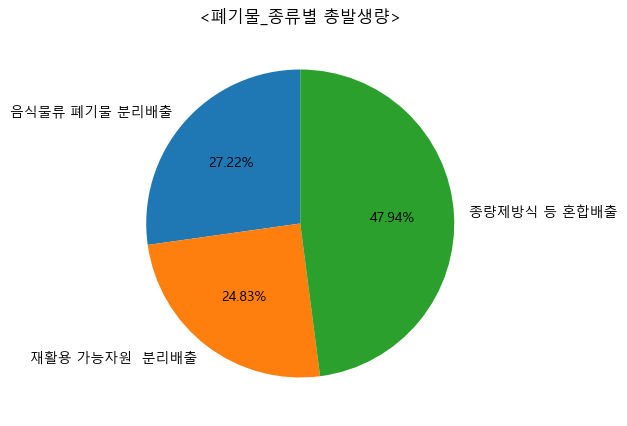

In [64]:
plt.figure(figsize=(10,5))

plt.pie(x = waste_group1_sum['발생량'],
        labels = waste_group1_sum.index,
        autopct='%.2f%%',
        startangle= 90 # 시계 반대방향
        )
plt.title('<폐기물_종류별 총발생량>')

plt.show()

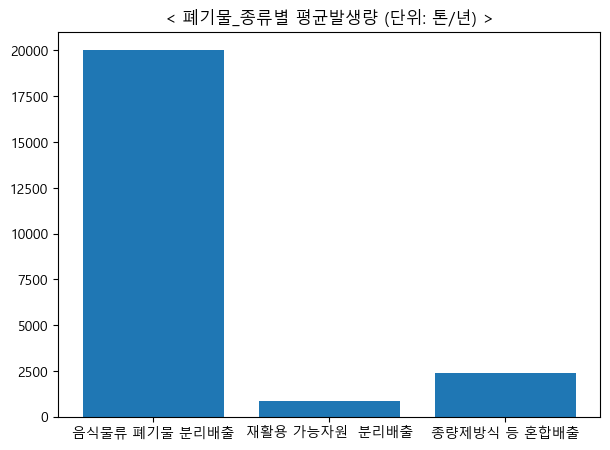

In [65]:
plt.figure(figsize=(7,5))
x = np.arange(len(waste_group1_mean.index))
y = waste_group1_mean['발생량'].to_list()

plt.bar(x, y)
plt.xticks(x, waste_group1_mean.index)
plt.title('< 폐기물_종류별 평균발생량 (단위: 톤/년) >')
plt.show()

# 음식물이 평균이 제일 높음

### 폐기물_종류별 통계량

In [66]:
waste_group1_sum

,재활용,소각,매립,기타,발생량
폐기물_종류,,,,,
음식물류 폐기물 분리배출,22285882.9,323737.9,209044.5,119882.4,22938547.7
재활용 가능자원 분리배출,19748412.5,908018.2,230012.8,37462.2,20923905.7
종량제방식 등 혼합배출,5657169.9,23543667.3,10816281.7,379270.1,40396389.0


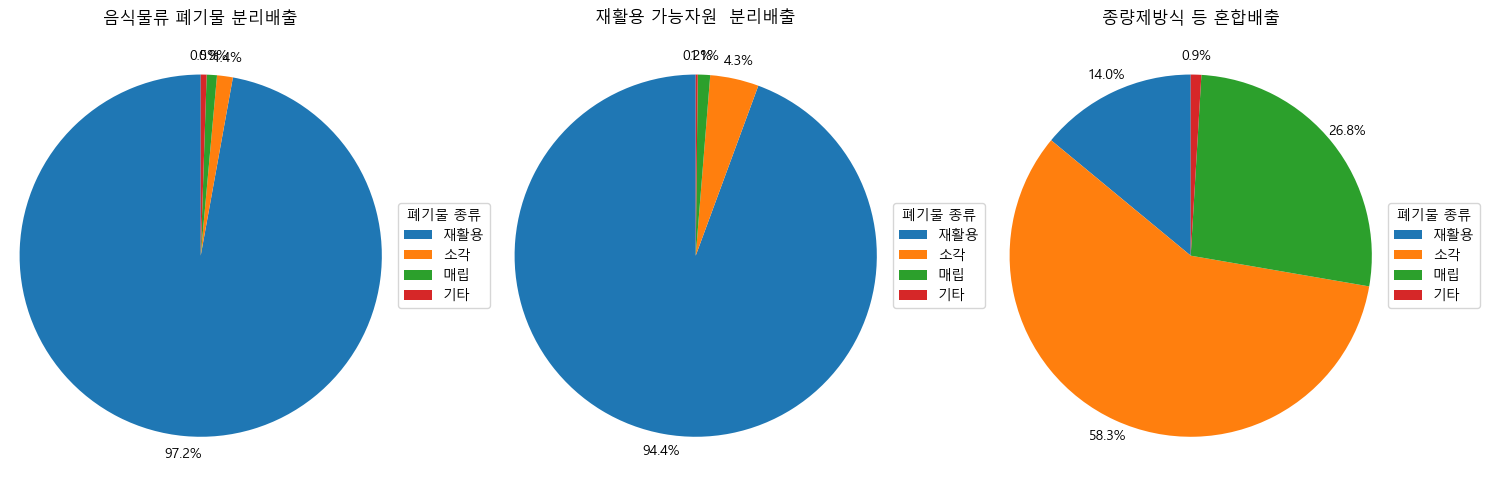

In [107]:
# '발생량' 컬럼 제외
forpiechart = waste_group1_sum.drop(columns='발생량')

# 하나의 Figure에 3개 파이차트 배치 (기본 색상 사용)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, (waste_type, row) in zip(axes, forpiechart.iterrows()):
    wedges, texts, autotexts = ax.pie(
        row,
        labels=None,            # 내부 레이블 생략
        autopct='%1.1f%%',
        startangle=90,
        # labeldistance=1,
        pctdistance=1.1
    )
    ax.set_title(waste_type)
    ax.axis('equal')  # 원형 유지

    # 범례 추가 (기본 색상에 맞춰)
    ax.legend(
        wedges,
        row.index,
        title="폐기물 종류",
        loc="center left",
        bbox_to_anchor=(1, 0.5)
    )

plt.tight_layout()
plt.show()

- 글자 안겹치게 하고 싶은데 시간 많을 때 하잠..
- 종량제에서 재활용이 그렇게 많지 않아서 종량제방식 등 혼합배출과 재활용 가능자원 분리배출 두개를 합쳐서 하는게 좋지않을까...?

# 연도 X 폐기물_종류

In [162]:
waste_group1_year = waste.groupby(['폐기물_종류','연도'])[['재활용', '소각', '매립', '기타', '발생량']].agg('sum').reset_index()
waste_group1_year

,폐기물_종류,연도,재활용,소각,매립,기타,발생량
0,음식물류 폐기물 분리배출,2019,4647289.5,86760.5,54275.5,7336.5,4795662.0
1,음식물류 폐기물 분리배출,2020,4556157.2,64071.0,48385.7,1765.1,4670379.0
2,음식물류 폐기물 분리배출,2021,4336599.9,64532.7,37995.5,36429.8,4475557.9
3,음식물류 폐기물 분리배출,2022,4443707.2,39483.1,35200.6,39175.0,4557565.9
4,음식물류 폐기물 분리배출,2023,4302129.1,68890.6,33187.2,35176.0,4439382.9
5,재활용 가능자원 분리배출,2019,3988647.0,240389.0,57305.0,21462.0,4307803.0
6,재활용 가능자원 분리배출,2020,4306252.5,225587.5,56685.2,2517.0,4591042.2
7,재활용 가능자원 분리배출,2021,3923303.4,154369.7,49851.6,425.7,4127950.4
8,재활용 가능자원 분리배출,2022,3741944.6,150224.3,37543.9,7482.4,3937195.2
9,재활용 가능자원 분리배출,2023,3788265.0,137447.7,28627.1,5575.1,3959914.9


- 종량제방식 중 재활용이 재활용 가능자원임은 아니라고 판단됨
  - 어떤 년도를 살펴봐도 종량제방식['재활용']이 재활용가능자원['재활용']도 재활용가능자원['발생량']도 아님을 확인할수 있음

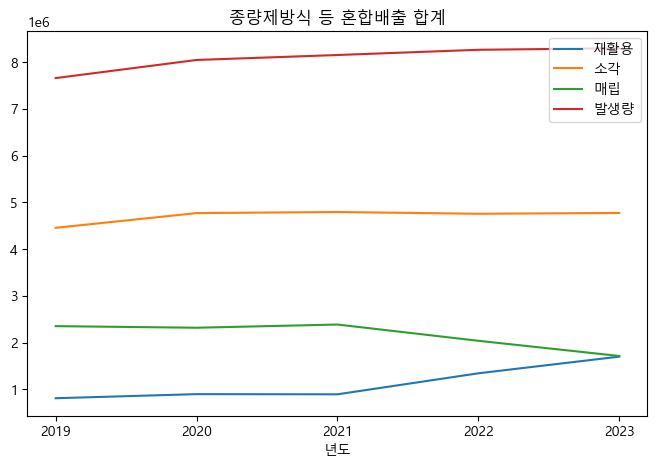

In [172]:
forplot = waste_group1_year[waste_group1_year['폐기물_종류']=='종량제방식 등 혼합배출']
plt.figure(figsize=(8,5))

plt.plot(forplot['연도'], forplot['재활용'], label = '재활용')
plt.plot(forplot['연도'], forplot['소각'], label = '소각')
plt.plot(forplot['연도'], forplot['매립'], label = '매립')
plt.plot(forplot['연도'], forplot['발생량'], label = '발생량')

plt.xlabel('년도') 
plt.xticks(forplot['연도'])
plt.legend()
plt.title('종량제방식 등 혼합배출 합계')
plt.show()

- 매립이 2022년도부터 감소
- 재활용이 2022년도부터 증가
- 발생량은 꾸준히 증가

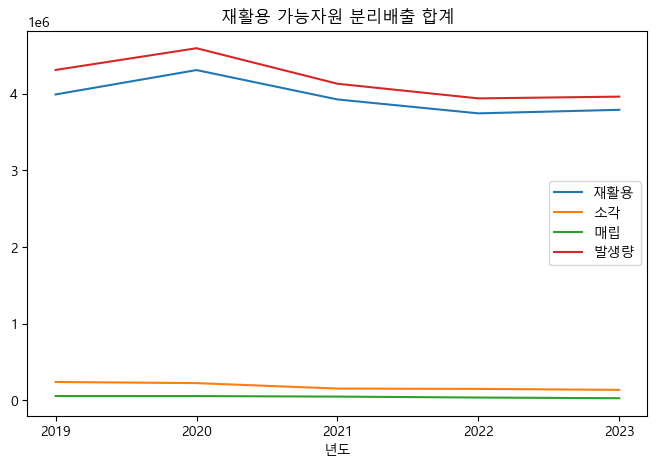

In [173]:
forplot = waste_group1_year[waste_group1_year['폐기물_종류']=='재활용 가능자원  분리배출']
plt.figure(figsize=(8,5))

plt.plot(forplot['연도'], forplot['재활용'], label = '재활용')
plt.plot(forplot['연도'], forplot['소각'], label = '소각')
plt.plot(forplot['연도'], forplot['매립'], label = '매립')
plt.plot(forplot['연도'], forplot['발생량'], label = '발생량')

plt.xlabel('년도') 
plt.xticks(forplot['연도'])

plt.legend()
plt.title('재활용 가능자원 분리배출 합계')
plt.show()

- 발생량 2020 증가 , 2021부터 다시 감소
- 발생량 중 재활용 비중이 높기 때문에 당연..
- 매립과 소각이 그리 중요하지 않음

- 재활용 중 세부 내용 eda가 그리 중요하지 않을 듯함

# 부산 X 폐기물_종류

In [183]:
busan = waste[waste['시도']=='부산']
busan = busan.groupby(['폐기물_종류','연도'])[['재활용', '소각', '매립', '기타', '발생량']].agg('sum').reset_index()
busan

,폐기물_종류,연도,재활용,소각,매립,기타,발생량
0,음식물류 폐기물 분리배출,2019,247032.0,0.0,0.0,0.0,247032.0
1,음식물류 폐기물 분리배출,2020,242014.3,0.0,0.0,0.0,242014.3
2,음식물류 폐기물 분리배출,2021,212768.2,0.0,0.0,72.0,212840.2
3,음식물류 폐기물 분리배출,2022,229759.5,0.0,195.0,0.0,229954.5
4,음식물류 폐기물 분리배출,2023,227790.4,0.0,0.0,0.0,227790.4
5,재활용 가능자원 분리배출,2019,467820.5,46282.0,0.0,0.0,514102.5
6,재활용 가능자원 분리배출,2020,530180.0,41055.6,0.0,0.0,571235.6
7,재활용 가능자원 분리배출,2021,228304.2,3775.0,0.0,0.0,232079.2
8,재활용 가능자원 분리배출,2022,211351.1,1754.8,12.0,0.0,213117.9
9,재활용 가능자원 분리배출,2023,207341.1,2294.9,0.0,0.0,209636.0


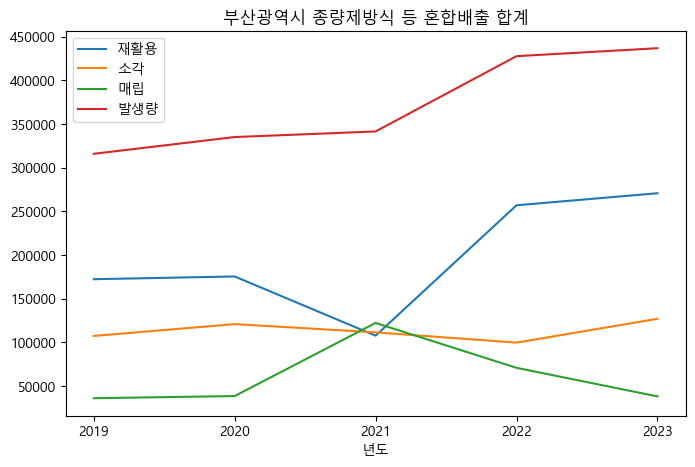

In [184]:
forplot = busan[busan['폐기물_종류']=='종량제방식 등 혼합배출']
plt.figure(figsize=(8,5))

plt.plot(forplot['연도'], forplot['재활용'], label = '재활용')
plt.plot(forplot['연도'], forplot['소각'], label = '소각')
plt.plot(forplot['연도'], forplot['매립'], label = '매립')
plt.plot(forplot['연도'], forplot['발생량'], label = '발생량')

plt.xlabel('년도') 
plt.xticks(forplot['연도'])
plt.legend()
plt.title('부산광역시 종량제방식 등 혼합배출 합계')
plt.show()

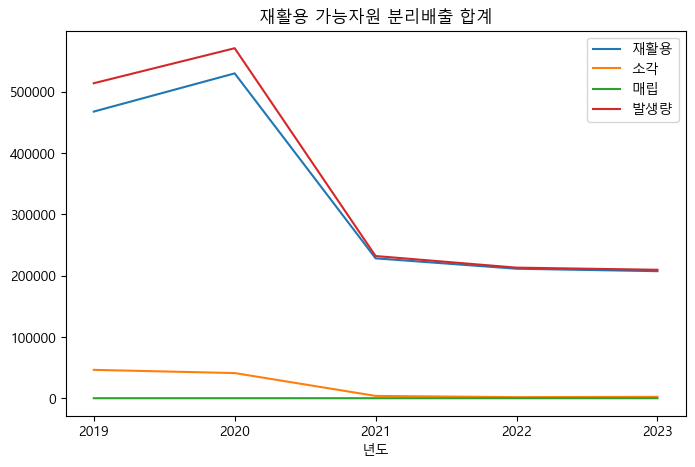

In [185]:
forplot = busan[busan['폐기물_종류']=='재활용 가능자원  분리배출']
plt.figure(figsize=(8,5))

plt.plot(forplot['연도'], forplot['재활용'], label = '재활용')
plt.plot(forplot['연도'], forplot['소각'], label = '소각')
plt.plot(forplot['연도'], forplot['매립'], label = '매립')
plt.plot(forplot['연도'], forplot['발생량'], label = '발생량')

plt.xlabel('년도') 
plt.xticks(forplot['연도'])

plt.legend()
plt.title('재활용 가능자원 분리배출 합계')
plt.show()

- 부산은 종량제방식에서 재활용은 높지만 재활용 가능자원 분리배출이 되고 있지 않음
- 결국 재활용을 종량제에 버리고 있다고 볼수도// 딱 21년도에 종량제는 증가하고잇음


- 재활용을 제대로 안하고 종량제에 버려서 인력이 들고잇다? 
  - -> 종량제가 커지고 있으니 종량제가 높아질 지역을 찾아 재활용을 잘 하도록 캠페인, 방안 등을 내놓자
  - -> 그 다음으로 종량제는 늘어나는데, 재활용이 낮아지는 곳을 찾기 (재활용이 낮아지는 것을 예측하는 것은 인구수, 세대 특징보다는 .. 가구종류나 젊은층이 못하나
       이런걸 살펴볼수는 있으나 크게 상관관계를 안가지고 있을듯하기도.., 재활용 시설이 부족한 지역으로 해석할수도)